<a href="https://colab.research.google.com/github/amanjain487/tsai-eva6/blob/main/Assignments/S10/coco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! ls /content/drive/MyDrive/coco_data/sample_coco.txt

/content/drive/MyDrive/coco_data/sample_coco.txt


In [3]:
import pandas as pd
import json
import re
text = []
with open("/content/drive/MyDrive/coco_data/sample_coco.txt") as f:
    for l in f.readlines():
        text.append(eval("{" + re.sub(r'([a-z]+)', r'"\1"', l) + "}"))
df = pd.read_json(json.dumps(text))


In [4]:
class_count_dict = df.id.value_counts().to_dict()

In [5]:
class_count_dict.items()

dict_items([(44, 153), (75, 147), (67, 145), (28, 145), (2, 142), (11, 142), (12, 142), (20, 142), (64, 141), (33, 140), (19, 140), (79, 140), (4, 139), (0, 138), (3, 138), (41, 137), (59, 137), (68, 136), (62, 136), (73, 135), (54, 134), (58, 133), (5, 133), (76, 133), (69, 132), (57, 132), (17, 132), (21, 132), (13, 131), (14, 130), (50, 130), (25, 130), (24, 129), (42, 129), (63, 128), (43, 128), (18, 128), (6, 127), (49, 126), (32, 126), (8, 126), (65, 125), (34, 125), (39, 125), (70, 124), (47, 123), (27, 123), (37, 123), (45, 123), (36, 123), (72, 122), (77, 122), (56, 122), (51, 122), (30, 122), (78, 122), (16, 122), (48, 121), (15, 121), (66, 120), (26, 119), (55, 118), (61, 117), (71, 117), (23, 117), (74, 117), (46, 116), (31, 115), (29, 113), (22, 112), (40, 112), (38, 111), (1, 111), (35, 110), (7, 109), (60, 106), (53, 105), (9, 102), (10, 102), (52, 102)])

In [6]:
coco_class_map = {0: u'__background__',
 1: u'person',
 2: u'bicycle',
 3: u'car',
 4: u'motorcycle',
 5: u'airplane',
 6: u'bus',
 7: u'train',
 8: u'truck',
 9: u'boat',
 10: u'traffic light',
 11: u'fire hydrant',
 12: u'stop sign',
 13: u'parking meter',
 14: u'bench',
 15: u'bird',
 16: u'cat',
 17: u'dog',
 18: u'horse',
 19: u'sheep',
 20: u'cow',
 21: u'elephant',
 22: u'bear',
 23: u'zebra',
 24: u'giraffe',
 25: u'backpack',
 26: u'umbrella',
 27: u'handbag',
 28: u'tie',
 29: u'suitcase',
 30: u'frisbee',
 31: u'skis',
 32: u'snowboard',
 33: u'sports ball',
 34: u'kite',
 35: u'baseball bat',
 36: u'baseball glove',
 37: u'skateboard',
 38: u'surfboard',
 39: u'tennis racket',
 40: u'bottle',
 41: u'wine glass',
 42: u'cup',
 43: u'fork',
 44: u'knife',
 45: u'spoon',
 46: u'bowl',
 47: u'banana',
 48: u'apple',
 49: u'sandwich',
 50: u'orange',
 51: u'broccoli',
 52: u'carrot',
 53: u'hot dog',
 54: u'pizza',
 55: u'donut',
 56: u'cake',
 57: u'chair',
 58: u'couch',
 59: u'potted plant',
 60: u'bed',
 61: u'dining table',
 62: u'toilet',
 63: u'tv',
 64: u'laptop',
 65: u'mouse',
 66: u'remote',
 67: u'keyboard',
 68: u'cell phone',
 69: u'microwave',
 70: u'oven',
 71: u'toaster',
 72: u'sink',
 73: u'refrigerator',
 74: u'book',
 75: u'clock',
 76: u'vase',
 77: u'scissors',
 78: u'teddy bear',
 79: u'hair drier',
 80: u'toothbrush'}

In [7]:
plot_dict = {}
for k in class_count_dict:
  plot_dict[coco_class_map[k]] = class_count_dict[k]

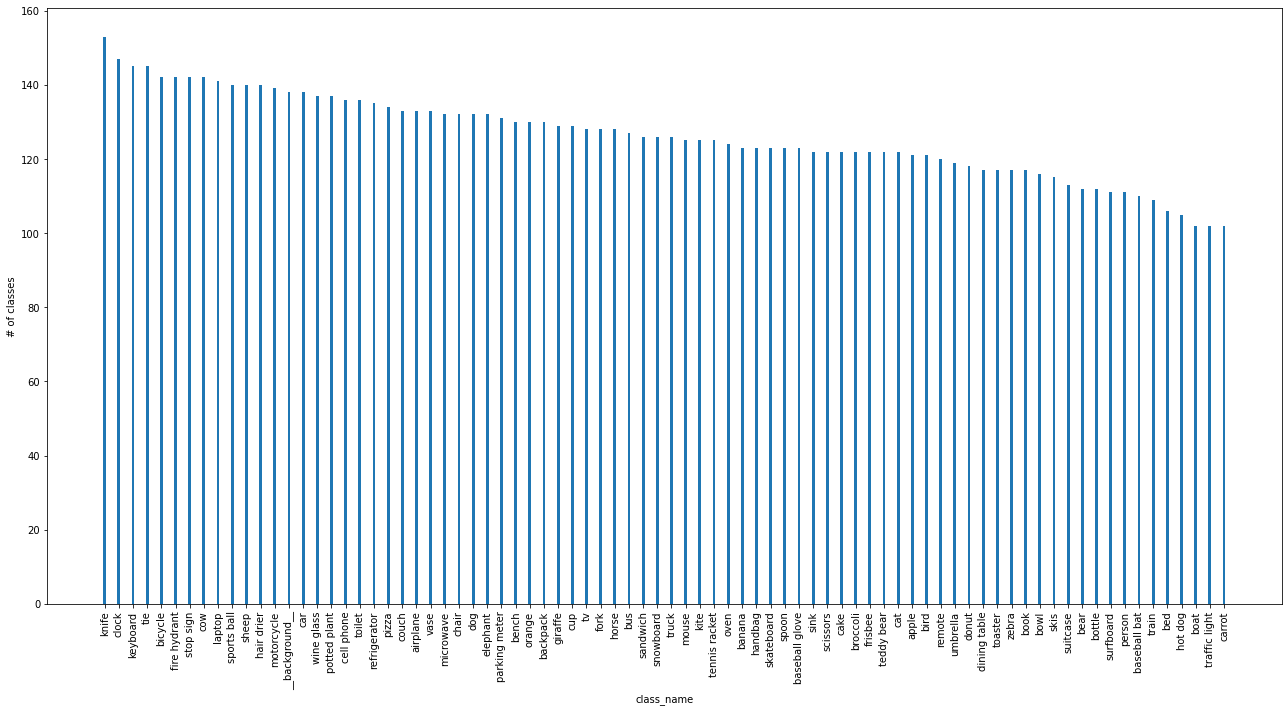

In [8]:
import matplotlib.pyplot as plt
import numpy as np
x = list(plot_dict.keys())
y = list(class_count_dict.values())

##the actual graph:
fig, ax = plt.subplots(figsize = (18,10))

idx = np.asarray([i for i in range(len(y))])

width = 0.2

ax.bar(idx, [val for key,val in plot_dict.items()], width=width)
ax.set_xticks(idx)
ax.set_xticklabels(x, rotation=90)
ax.set_xlabel('class_name')
ax.set_ylabel('# of classes')

fig.tight_layout()

plt.show()

### Anchor Box Calculation

In [9]:
df.head()

,id,height,width,bbox
0,0,330,1093,"[69, 464, 312, 175]"
1,1,782,439,"[359, 292, 83, 199]"
2,3,645,831,"[297, 312, 267, 167]"
3,34,943,608,"[275, 112, 319, 290]"
4,20,593,857,"[71, 368, 146, 147]"


In [10]:
# Computing the centre location, width and height of each bounding box
df["x"] = df['bbox'].map(lambda bb: bb[0])
df["y"] = df['bbox'].map(lambda bb: bb[1])
df["w"] = df['bbox'].map(lambda bb: bb[2])
df["h"] = df['bbox'].map(lambda bb: bb[3])
# df.drop('bbox', axis=1, inplace=True)

#Normalizing above by image dimensions (in the datasets)

df['nh'] = df['h']/df['height']
df['nw'] = df['w']/df['width']

nhwdf = df[['nw', 'nh']].copy()
nhwnp = np.array(nhwdf)
nhwdf.describe()

,nw,nh
count,10105.000000,10105.000000
mean,0.323393,0.325578
std,0.147178,0.145902
min,0.046964,0.047344
25%,0.211538,0.217931
50%,0.316785,0.320138
75%,0.414195,0.415625
max,0.894366,0.877551


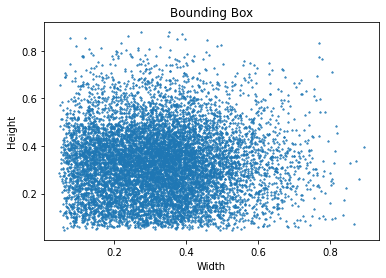

In [11]:

plt.scatter(nhwdf['nw'], nhwdf['nh'], s=3, marker='*', alpha=0.7)
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Bounding Box")
plt.show()

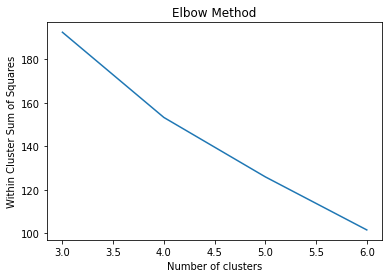

In [12]:
from sklearn.cluster import KMeans

#Elbow Method
wcss = []
for i in range(3,7):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(nhwnp)
    wcss.append(kmeans.inertia_)
plt.plot(range(3,7), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.show()

### Calculating Anchor Boxes

#### What it really does in determining anchor box

It will create a thouasands of anchor box (i.e Clusters in k-means) for each predictor that represent shape, location, size etc.
For each anchor box, calculate which object’s bounding box has the highest overlap divided by non-overlap. This is called Intersection Over Union or IOU.
If the highest IOU is greater than 50% ( This can be customized), tell the anchor box that it should detect the object it has highest IOU.
Otherwise if the IOU is greater than 40%, tell the neural network that the true detection is ambiguous and not to learn from that example.
If the highest IOU is less than 40%, then it should predict that there is no object.

In [13]:
# fitting multiple k-means algorithms and storing the values in an empty list
sse = []
centroids = []
predictions = []
clusters = list(range(3, 7))
for cluster in clusters:
    kmeans = KMeans(n_clusters=cluster, init='k-means++')
    kmeans.fit(nhwnp)
    centroids.append(kmeans.cluster_centers_)
    sse.append(kmeans.inertia_)
    predictions.append(kmeans.predict(nhwnp))

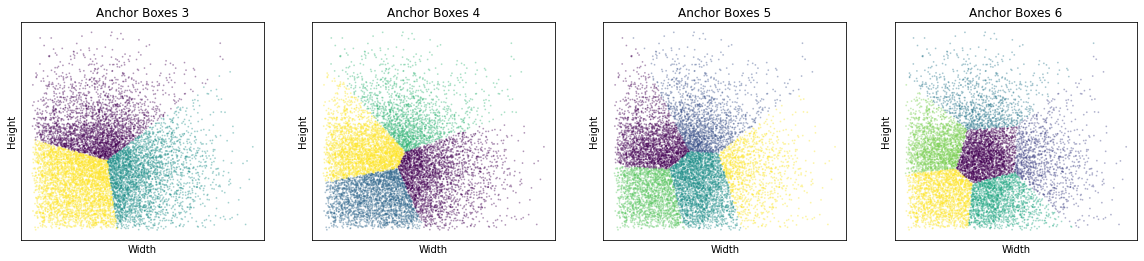

In [14]:
fig = plt.figure(figsize=(20, 4))

for i, c in zip(range(len(clusters)), clusters):
    ax = fig.add_subplot(1, len(clusters), i + 1, xticks=[], yticks=[])
    ax.set_title("Anchor Boxes "+str(c))
    ax.set_xlabel("Width")
    ax.set_ylabel("Height")
    plt.scatter(nhwdf['nw'], nhwdf['nh'], s=3, marker='.', alpha=0.3, c=predictions[i]/c)
plt.show()

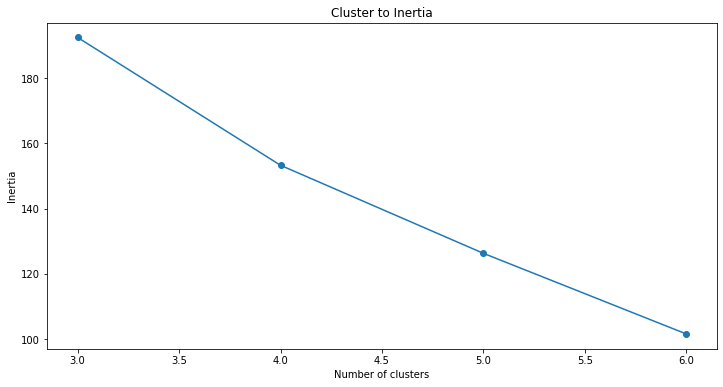

In [15]:
# converting the results into a dataframe and plotting them
plt.figure(figsize=(12,6))
plt.plot(clusters, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title("Cluster to Inertia")
plt.show()

In [16]:
# We computed the different numbers of clusters (centroids) using K means.

# Now we compute the mean of maximum IOU between bounding boxes and individual anchors.
# Ref: https://github.com/experiencor/keras-yolo3/blob/master/gen_anchors.py

def IOU(ann, centroids):
    w, h = ann
    similarities = []

    for centroid in centroids:
        c_w, c_h = centroid

        if c_w >= w and c_h >= h:
            similarity = w*h/(c_w*c_h)
        elif c_w >= w and c_h <= h:
            similarity = w*c_h/(w*h + (c_w-w)*c_h)
        elif c_w <= w and c_h >= h:
            similarity = c_w*h/(w*h + c_w*(c_h-h))
        else: #means both w,h are bigger than c_w and c_h respectively
            similarity = (c_w*c_h)/(w*h)
        similarities.append(similarity) # will become (k,) shape

    return np.array(similarities)


def avg_iou(ious):
    n = ious.shape[0]
    sums = 0.
    for i in range(n):
        # note iou() will return array which contains IoU for each centroid and X[i]
        # slightly ineffective, but I am too lazy
        sums += max(ious[i])
    return sums / n

def avg_IOU(anns, centroids):
    n,d = anns.shape
    sum = 0.

    for i in range(anns.shape[0]):
        sum+= max(IOU(anns[i], centroids))

    return sum/n


In [17]:
ious = []
for c in range(len(clusters)):
    nhwdf['iou'+str(c)] = ious.append(avg_iou(np.array(nhwdf[['nw', 'nh']].apply(lambda r: IOU((r['nw'], r['nh']), centroids[c]), axis=1))))

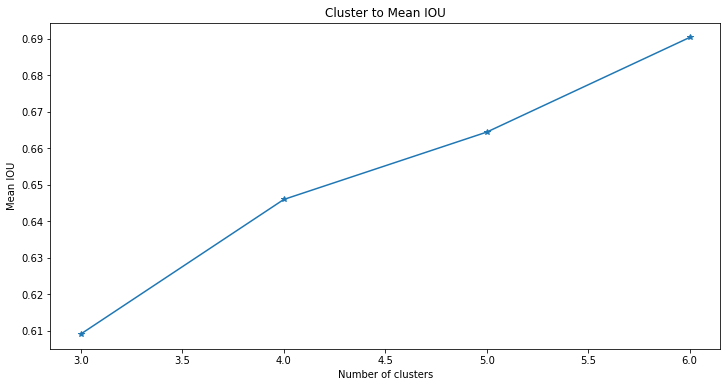

In [18]:
plt.figure(figsize=(12,6))
plt.plot(clusters, ious, marker='*')
plt.xlabel('Number of clusters')
plt.ylabel('Mean IOU')
plt.title("Cluster to Mean IOU")
plt.show()